# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [51]:
# %matplotlib inline

# from IPython.core.pylabtools import figsize


# figsize(12, 8)

# sns.set()

## Parte 1

### _Setup_ da parte 1

In [52]:
np.random.seed(42)
    
df = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

Primeiramente, vamos observar a parte superior do dataframe, as estatísticas principais dos dados e também observar os gráficos das distribuições.

In [53]:
df.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [54]:
df.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


As duas distribuições são bastante similares, incluindo os valores das estatísticas principais, tais como a média, valores mínimos e máximos. A primeira distribuição é uma distribuição contínua (normal) e a segunda é uma distribuição discreta (binomial).

Vamos observar graficamente o comportamento destas distribuições.

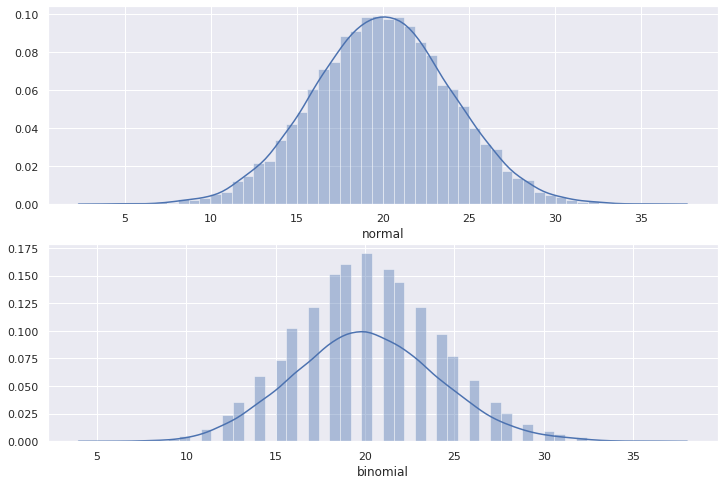

In [55]:
fig, axis = plt.subplots(2,1)
sns.distplot(df.normal, ax=axis[0])
sns.distplot(df.binomial, ax=axis[1])

Nota-se no gráfico, portanto, a semelhança entre as duas distribuições, verificando a média e curva de distribuição de probabilidade bastante similares. Com a diferença, é claro, de que a primeira trata de uma distribuição contínua e a segunda de uma distribuição discreta.

Vamos calcular alguns valores estatísticos para testar funções que poderão ser utilizadas nas respostas das questões abaixo.

In [56]:
# Quartis
quartis = df.normal.quantile([0.25, 0.5, 0.75])
print(quartis)
# Média
media = df.normal.mean()
print(round(media,3))
# desvio padrão
std = df.normal.std()
print(round(std,3))

0.25    17.309638
0.50    19.989620
0.75    22.684324
Name: normal, dtype: float64
19.991
4.014


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [57]:
def q1():
    q_norm = df.normal.quantile([0.25, 0.5, 0.75])
    q_binom = df.binomial.quantile([0.25, 0.5, 0.75])
    diff = (round(q_norm[0.25]-q_binom[0.25],3), round(q_norm[0.5]-q_binom[0.5],3), round(q_norm[0.75]-q_binom[0.75],3))
    return diff

In [58]:
print('Testando q1:')
q1()

Testando q1:


(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [75]:
def q2():
    # Cria o objeto com a CDF para a distribuição normal
    ecdf = ECDF(df.normal)
    # Calcula a probabilidade acumulada para mean-std
    p_inf = ecdf(df.normal.mean()-df.normal.std())
    # Calcula a probabilidade acumulada para mean+std
    p_sup = ecdf(df.normal.mean()+df.normal.std())
    # Retorna a probabilidade no intervalo
    return(float(round(p_sup-p_inf, 3)))

In [77]:
print("Testando q2:")
type(q2())

Testando q2:


float

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

Sim, o valor se aproxima do valor esperado teórico (68,27%).

Os demais valores típicos, com mean-2std e mean-3std, se aproximam também do valor esperado, como pode ser observado abaixo.

In [61]:
# Cria o objeto com a CDF para a distribuição normal
ecdf = ECDF(df.normal)
# Calcula a probabilidade acumulada para mean-std
p_inf = ecdf(df.normal.mean()-2*df.normal.std())
# Calcula a probabilidade acumulada para mean+std
p_sup = ecdf(df.normal.mean()+2*df.normal.std())
# Retorna a probabilidade no intervalo
print('Probabilidade entre mean-2std e mean+2std: {}'.format(round(p_sup-p_inf, 3)))
# Cria o objeto com a CDF para a distribuição normal
ecdf = ECDF(df.normal)
# Calcula a probabilidade acumulada para mean-std
p_inf = ecdf(df.normal.mean()-3*df.normal.std())
# Calcula a probabilidade acumulada para mean+std
p_sup = ecdf(df.normal.mean()+3*df.normal.std())
# Retorna a probabilidade no intervalo
print('Probabilidade entre mean-3std e mean+3std: {}'.format(round(p_sup-p_inf, 3)))

Probabilidade entre mean-2std e mean+2std: 0.954
Probabilidade entre mean-3std e mean+3std: 0.997


## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [62]:
def q3():
    m_binom = df.binomial.mean()
    v_binom = df.binomial.std()**2
    m_norm = df.normal.mean()
    v_norm = df.normal.std()**2
    return((round(m_binom-m_norm, 3), round(v_binom-v_norm, 3)))

In [63]:
print('Testando q3:')
q3()

Testando q3:


(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [64]:
stars = pd.read_csv("HTRU_2.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

Vamos começar analisando a estrutura do conjunto de dados e estatísticas descritivas primárias.

In [65]:
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [66]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [84]:
def q4():
    # Filtra o dataframe
    stars_false = stars[stars.target==False].copy()
    stars_false_mean = stars_false.mean_profile.mean()
    stars_false_std = stars_false.mean_profile.std()
    # Cálcula do valor padronizado
    # Pode ser calculado também com bibliotecas (scikit-learn)
    # Porém nesta atividade preferi fazer "na mão"
    stars_false['false_pulsar_mean_profile_standardized'] = (stars_false.mean_profile-stars_false_mean)/stars_false_std
    # Como padrão sct.norm é uma dist com média 0 e std 1
    q80 = sct.norm.ppf(0.8)
    q90 = sct.norm.ppf(0.9)
    q95 = sct.norm.ppf(0.95)
    # Cria a distribuição CDF
    ecdf = ECDF(stars_false.false_pulsar_mean_profile_standardized)
    p80 = round(ecdf(q80), 3)
    p90 = round(ecdf(q90), 3)
    p95 = round(ecdf(q95), 3)
    return((p80, p90, p95))

In [85]:
print('Testando q4:')
q4()

Testando q4:


(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [107]:
# A diferença vai ser igual a zero (ou muito próxima a zero) 
def q5():
    # Filtra o dataframe
    stars_false = stars[stars.target==False].copy()
    stars_false_mean = stars_false.mean_profile.mean()
    stars_false_std = stars_false.mean_profile.std()
    # Cálcula do valor padronizado
    stars_false['false_pulsar_mean_profile_standardized'] = (stars_false.mean_profile-stars_false_mean)/stars_false_std
    # Calcula os quartis para a distribuição
    q1 = stars_false.false_pulsar_mean_profile_standardized.quantile(0.25)
    q2 = stars_false.false_pulsar_mean_profile_standardized.quantile(0.5)
    q3 = stars_false.false_pulsar_mean_profile_standardized.quantile(0.75)
    # Como padrão sct.norm é uma dist com média 0 e std 1
    q1_teorico = sct.norm.ppf(0.25)
    q2_teorico = sct.norm.ppf(0.50)
    q3_teorico = sct.norm.ppf(0.75)
    # Cálculo da diferença
    diff_q1 = float(round(q1-q1_teorico, 3))
    diff_q2 = float(round(q2-q2_teorico, 3))
    diff_q3 = float(round(q3-q3_teorico, 3))
    return((diff_q1, diff_q2, diff_q3))

In [108]:
print("Testando q5:")
q5()

Testando q5:


(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.